# EDA - UFC

### Título

Análisis de luchadores de la UFC, sus características físicas y técnicas y como influyen en su rendimiento.

### Descripción del proyecto
Este proyecto tiene como objetivo analizar diferentes aspectos de los luchadores de la UFC para ver como influyen en su rendimiento.

### Hipótesis

El objetivo principal es confirmar si ciertos aspectos fisicos y formas de luchar influyen en el rendimiento.
* hipotesis_1 = Relación entre altura, peso y alcance. Evaluar si existe una correlación entre estas características físicas y el rendimiento en combate.
* hipotesis_2 = Impacto de la guardia en el rendimiento: Averiguar si los luchadores con guardia "Orthodox" tienen un mejor rendimiento (más victorias) que los luchadores con guardia "Southpaw".
* hipotesis_3 = Edad y rendimiento: Investigar si la edad de un luchador está correlacionada con su número de victorias o derrotas.
* hipotesis_4 = Comparación entre golpeadores y grapplers: Examinar si los luchadores que conectan más golpes significativos por minuto (SLpM) tienen más éxito que aquellos que se enfocan más en los derribos y sumisiones.

## DATOS

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Dataframes y su fuente
df_1 = pd.DataFrame()
fuente_1 = "data/1-mma_ufc_fighter_data.csv"
df_2 = pd.DataFrame()
fuente_2 = "data/2-ufc-fighters-statistics-2024.csv"
df_3 = pd.DataFrame()
fuente_3 = "data/3-ufc-fighters-statistics.csv"
df_6 = pd.DataFrame()
fuente_6 = "data/6-ufc_fighter_stats.csv"

## DATAFRAMES ##

In [50]:
# Primer dataset
df1 = pd.read_csv("data/1-mma_ufc_fighter_data.csv", sep = ",")

In [51]:
df1.head()

,fighter_id,fighter_f_name,fighter_l_name,fighter_nickname,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_dob,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_url
0,4107,Tom,Aaron,NaN,NaN,155.0,NaN,NaN,1978-07-13,5,3,0,NaN,http://ufcstats.com/fighter-details/93fe7332d1...
1,4106,Danny,Abbadi,The Assassin,180.34,155.0,NaN,Orthodox,1983-07-03,4,6,0,NaN,http://ufcstats.com/fighter-details/15df64c02b...
2,4105,Nariman,Abbasov,Bayraktar,172.72,155.0,167.64,Orthodox,1994-02-01,28,4,0,NaN,http://ufcstats.com/fighter-details/59a9d6dac6...
3,4104,David,Abbott,Tank,182.88,265.0,NaN,Switch,NaN,10,15,0,NaN,http://ufcstats.com/fighter-details/b361180739...
4,4103,Hamdy,Abdelwahab,The Hammer,187.96,264.0,182.88,Southpaw,1993-01-22,5,0,0,1.0,http://ufcstats.com/fighter-details/3329d692ae...


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107 entries, 0 to 4106
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fighter_id          4107 non-null   int64  
 1   fighter_f_name      4107 non-null   object 
 2   fighter_l_name      4092 non-null   object 
 3   fighter_nickname    2250 non-null   object 
 4   fighter_height_cm   3797 non-null   float64
 5   fighter_weight_lbs  4020 non-null   float64
 6   fighter_reach_cm    2166 non-null   float64
 7   fighter_stance      3273 non-null   object 
 8   fighter_dob         3349 non-null   object 
 9   fighter_w           4107 non-null   int64  
 10  fighter_l           4107 non-null   int64  
 11  fighter_d           4107 non-null   int64  
 12  fighter_nc_dq       482 non-null    float64
 13  fighter_url         4107 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 449.3+ KB


In [35]:
df1.describe

<bound method NDFrame.describe of       fighter_id fighter_f_name fighter_l_name fighter_nickname  \
0           4107            Tom          Aaron              NaN   
1           4106          Danny         Abbadi     The Assassin   
2           4105        Nariman        Abbasov        Bayraktar   
3           4104          David         Abbott             Tank   
4           4103          Hamdy     Abdelwahab       The Hammer   
...          ...            ...            ...              ...   
4102           5           Dave       Zitanick              NaN   
4103           4           Alex         Zuniga              NaN   
4104           3         George         Zuniga              NaN   
4105           2          Allan         Zuniga            Tigre   
4106           1         Virgil        Zwicker           RezDog   

      fighter_height_cm  fighter_weight_lbs  fighter_reach_cm fighter_stance  \
0                   NaN               155.0               NaN            NaN   
1

In [56]:
# Combinar las columnas "fighter_f_name" y "fighter_l_name"
df1['Name'] = df1['fighter_f_name'] + ' ' + df1['fighter_l_name']

In [57]:
# Borrar columnas
df1 = df1.drop(columns=['fighter_url', 'fighter_f_name', 'fighter_l_name'])

In [59]:
# Extraer la columna 'name'
col = df1.pop('Name')

In [60]:
# Insertar la columna 'name' en la segunda posición (índice 1)
df1.insert(1, 'Name', col)

In [64]:
# Factor de conversión de libras a kilogramos
lbs_to_kgs = 0.453592
# Convertir los valores de 'weight_lbs' a kilogramos, redondear y almacenarlos en una nueva columna 'weight_kgs'
df1['Weight_kg'] = (df1['fighter_weight_lbs'] * lbs_to_kgs).round(2)

In [65]:
# Extraer la columna 'Weight_kg'
col = df1.pop('Weight_kg')

In [66]:
# Insertar la columna 'Weight_kg' en la segunda posición (índice 1)
df1.insert(4, 'Weight_kg', col)

In [67]:
# Borrar columna "fighter_weight_lbs"
df1 = df1.drop(columns=["fighter_weight_lbs"])

In [68]:
# Renombrar columnas
df1.rename(columns={'fighter_id': 'id',
                    'fighter_nickname': 'Nickname',
                    'fighter_height_cm': 'Height_cm',
                    'fighter_reach_cm': 'Reach_cm',
                    'fighter_stance': 'Stance',
                    'fighter_dob': 'Date of Birth',
                    'fighter_w': 'Victories',
                    'fighter_l': 'Defeats',
                    'fighter_d': 'Draws',
                    }, inplace=True)
df1


,Height_cm,Name,Reach_cm,Weight_kg,Stance,Date of Birth,Victories,Defeats,Draws,fighter_nc_dq
0,NaN,Tom Aaron,NaN,70.31,NaN,1978-07-13,5,3,0,NaN
1,180.34,Danny Abbadi,NaN,70.31,Orthodox,1983-07-03,4,6,0,NaN
2,172.72,Nariman Abbasov,167.64,70.31,Orthodox,1994-02-01,28,4,0,NaN
3,182.88,David Abbott,NaN,120.20,Switch,NaN,10,15,0,NaN
4,187.96,Hamdy Abdelwahab,182.88,119.75,Southpaw,1993-01-22,5,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
4102,NaN,Dave Zitanick,NaN,77.11,NaN,1980-03-05,5,7,0,1.0
4103,NaN,Alex Zuniga,NaN,65.77,NaN,NaN,6,3,0,NaN
4104,175.26,George Zuniga,NaN,83.91,NaN,NaN,3,1,0,NaN
4105,170.18,Allan Zuniga,177.80,70.31,Orthodox,1992-04-04,13,1,0,NaN


In [69]:
# Contar descalificaciones y no results (fighter_nc_dq)
contar_nan_descalificaciones = df1['fighter_nc_dq'].isna().sum()
contar_nan_descalificaciones

3625

In [70]:
# Borrar columna "fighter_nc_dq" (3625 nan de 4107 resultados)
df1 = df1.drop(columns=["fighter_nc_dq"])

In [71]:
df1

,Height_cm,Name,Reach_cm,Weight_kg,Stance,Date of Birth,Victories,Defeats,Draws
0,NaN,Tom Aaron,NaN,70.31,NaN,1978-07-13,5,3,0
1,180.34,Danny Abbadi,NaN,70.31,Orthodox,1983-07-03,4,6,0
2,172.72,Nariman Abbasov,167.64,70.31,Orthodox,1994-02-01,28,4,0
3,182.88,David Abbott,NaN,120.20,Switch,NaN,10,15,0
4,187.96,Hamdy Abdelwahab,182.88,119.75,Southpaw,1993-01-22,5,0,0
...,...,...,...,...,...,...,...,...,...
4102,NaN,Dave Zitanick,NaN,77.11,NaN,1980-03-05,5,7,0
4103,NaN,Alex Zuniga,NaN,65.77,NaN,NaN,6,3,0
4104,175.26,George Zuniga,NaN,83.91,NaN,NaN,3,1,0
4105,170.18,Allan Zuniga,177.80,70.31,Orthodox,1992-04-04,13,1,0


In [76]:
# Borro las filas de luchadores que contienen valores NaN
df1_sin_nan = df1.dropna()
df1_sin_nan

,Height_cm,Name,Reach_cm,Weight_kg,Stance,Date of Birth,Victories,Defeats,Draws
2,172.72,Nariman Abbasov,167.64,70.31,Orthodox,1994-02-01,28,4,0
4,187.96,Hamdy Abdelwahab,182.88,119.75,Southpaw,1993-01-22,5,0,0
5,190.50,Shamil Abdurakhimov,193.04,106.59,Orthodox,1981-09-02,20,8,0
7,180.34,Daichi Abe,180.34,77.11,Orthodox,1991-11-27,6,2,0
10,182.88,Klidson Abreu,187.96,92.99,Orthodox,1992-12-24,15,4,0
...,...,...,...,...,...,...,...,...,...
4094,165.10,Yao Zhikui,162.56,56.70,Orthodox,1991-02-07,2,4,0
4095,162.56,Zhalgas Zhumagulov,167.64,56.70,Switch,1988-08-29,14,9,0
4096,185.42,Fares Ziam,190.50,70.31,Orthodox,1997-03-21,14,4,0
4100,167.64,Cat Zingano,172.72,65.77,Southpaw,1982-07-01,10,4,0


In [77]:
# Averiguar correlacion entre fisico y rendimiento
# Para ello selecciono las columnas relevantes para el análisis de correlación
columnas_de_interes = ['Height_cm', 'Weight_kg', 'Reach_cm', 'Victories', 'Defeats', 'Draws']
df1_selec = df1[columnas_de_interes]

# Calcular la matriz de correlación
correlation_matrix = df1_selec.corr()
correlation_matrix

,Height_cm,Weight_kg,Reach_cm,Victories,Defeats,Draws
Height_cm,1.000000,0.722857,0.887430,0.018164,0.036366,-0.036603
Weight_kg,0.722857,1.000000,0.751869,-0.020154,0.070190,0.003075
Reach_cm,0.887430,0.751869,1.000000,0.122573,0.068344,-0.035589
Victories,0.018164,-0.020154,0.122573,1.000000,0.625544,0.277186
Defeats,0.036366,0.070190,0.068344,0.625544,1.000000,0.349744
Draws,-0.036603,0.003075,-0.035589,0.277186,0.349744,1.000000


In [99]:
# Contar la frecuencia de cada tipo de guardia
stance_counts = df1_sin_nan['Stance'].value_counts()

# Porcentaje de cada tipo de guardia
stance_porcentajes = (stance_counts / stance_counts.sum()) * 100

# Redondeo los resultados a 2 decimales
stance_porcentajes_redondeado = stance_porcentajes.round(2)
stance_porcentajes_redondeado

Stance
Orthodox       74.43
Southpaw       17.93
Switch          7.56
Open Stance     0.09
Name: count, dtype: float64

In [84]:
num_open_stance = (df1['Stance'] == 'Open Stance').sum()
num_open_stance

7

In [92]:
num_sideways = (df1['Stance'] == 'Sideways').sum()
num_sideways

3

In [95]:
df1 = df1.loc[df1['Stance'] != 'Sideways']

In [85]:
df1 = df1.loc[df1['Stance'] != 'Open Stance']

In [101]:
# Filtrar el DataFrame para quitar "Open Stance" y "Sideways"
df_filtered = df1[(df1['Stance'] != 'Open Stance') & (df1['Stance'] != 'Sideways')]

# Contar la frecuencia de cada tipo de guardia
stance_counts = df_filtered['Stance'].value_counts()

# Porcentaje de cada tipo de guardia
stance_porcentajes = (stance_counts / stance_counts.sum()) * 100

# Redondeo los resultados a 2 decimales
stance_porcentajes_redondeado = stance_porcentajes.round(2)
stance_porcentajes_redondeado

Stance
Orthodox    77.02
Southpaw    17.13
Switch       5.85
Name: count, dtype: float64

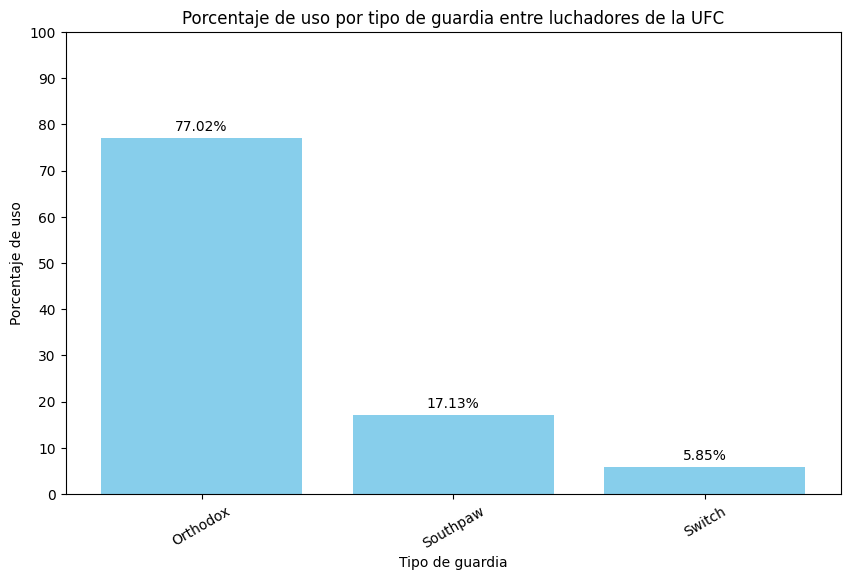

In [103]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(stance_porcentajes_redondeado.index, stance_porcentajes_redondeado, color='skyblue')

plt.xlabel('Tipo de guardia')
plt.ylabel('Porcentaje de uso')
plt.title('Porcentaje de uso por tipo de guardia entre luchadores de la UFC')
plt.xticks(rotation=30)
plt.yticks(range(0, 101, 10))  # Eje vertical graduado de 0 a 100 en pasos de 10

for i, v in enumerate(stance_porcentajes_redondeado):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

In [187]:
print(stance_stats.columns)

Index(['wins', 'losses'], dtype='object')


In [104]:

df_filtered = df1[(df1['Stance'] != 'Open Stance') & (df1['Stance'] != 'Sideways')]

columnas_de_interes = ['Stance', 'Victories', 'Defeats']
df_selec_filtrado = df_filtered[columnas_de_interes]

df_selec_filtrado = df_selec_filtrado.dropna()

stance_stats = df_selec_filtrado.groupby('Stance').mean().round(2)

stance_stats

,Victories,Defeats
Stance,,
Orthodox,13.42,6.01
Southpaw,14.62,6.33
Switch,11.43,4.21


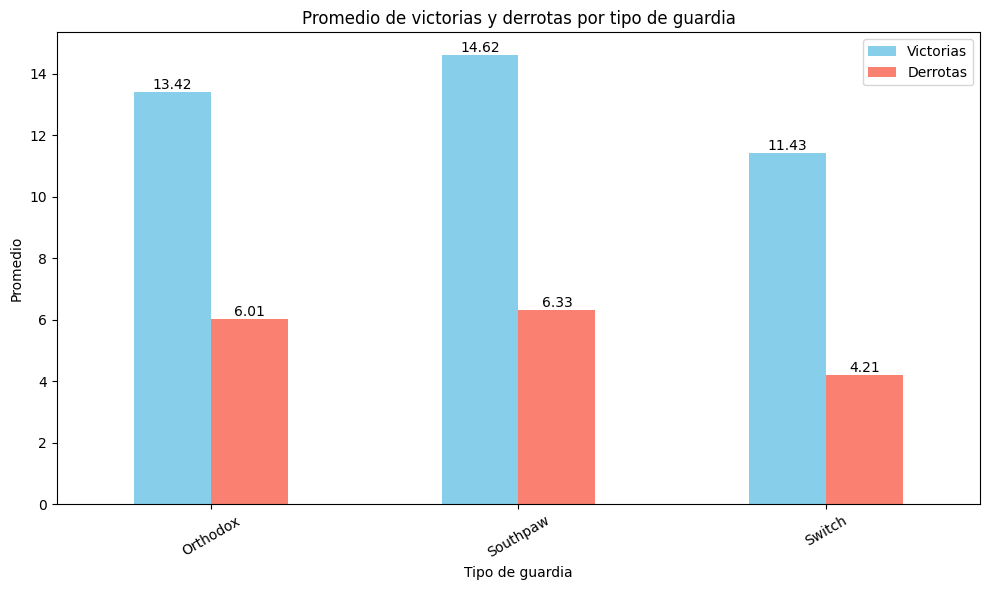

In [106]:
# Crear grafico de barras para el promedio de victorias y derrotas
ax = stance_stats[['Victories', 'Defeats']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

# Información
plt.xlabel('Tipo de guardia')
plt.ylabel('Promedio')
plt.title('Promedio de victorias y derrotas por tipo de guardia')
plt.xticks(rotation=30)
plt.legend(['Victorias', 'Derrotas'])

# Añadir promedios sobre cada barra del gráfico
for i, bars in enumerate(ax.containers):
    for bar in bars:
        yval = bar.get_height()
        if yval > 0:  # Add only if the value is greater than 0
            ax.text(bar.get_x() + bar.get_width() / 2, yval, f'{round(yval, 2)}', ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [186]:
print(stance_stats.columns)

Index(['wins', 'losses'], dtype='object')


In [ ]:
# Filtrar para quitar "Open Stance" y "Sideways"
stance_stats_filtrado = stance_stats[(df1['Stance'] != 'Open Stance') & (stance_stats['Stance'] != 'Sideways')]

# Calcular el porcentaje de victorias
stance_stats_filtrado['Victories Percentage'] = (stance_stats_filtrado['Victories'] / (stance_stats_filtrado['Victories'] + stance_stats_filtrado['Defeats'])) * 100

# Establecer el tipo de guardia como el índice
stance_stats_filtrado.set_index('Stance', inplace=True)

stance_stats_filtrado

In [ ]:
print(stance_stats.columns)

In [ ]:
# Filtrar para quitar "Open Stance" y "Sideways"
stance_stats_filtrado = stance_stats[(stance_stats['Stance'] != 'Open Stance') & (stance_stats['Stance'] != 'Sideways')]

# Gráfico de barras para los porcentajes de victorias por tipo de guardia
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(stance_stats_filtrado.index, stance_stats_filtrado['Victories Percentage'], color='skyblue')

# Etiquetas y título
plt.xlabel('Tipo de guardia')
plt.ylabel('Porcentaje de victorias')
plt.title('Porcentaje de victorias por tipo de guardia entre luchadores de la UFC')
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 10))  # Eje vertical graduado de 0 a 100 en pasos de 10

# Porcentaje encima de cada barra
for i, v in enumerate(stance_stats_filtrado['Victories Percentage']):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

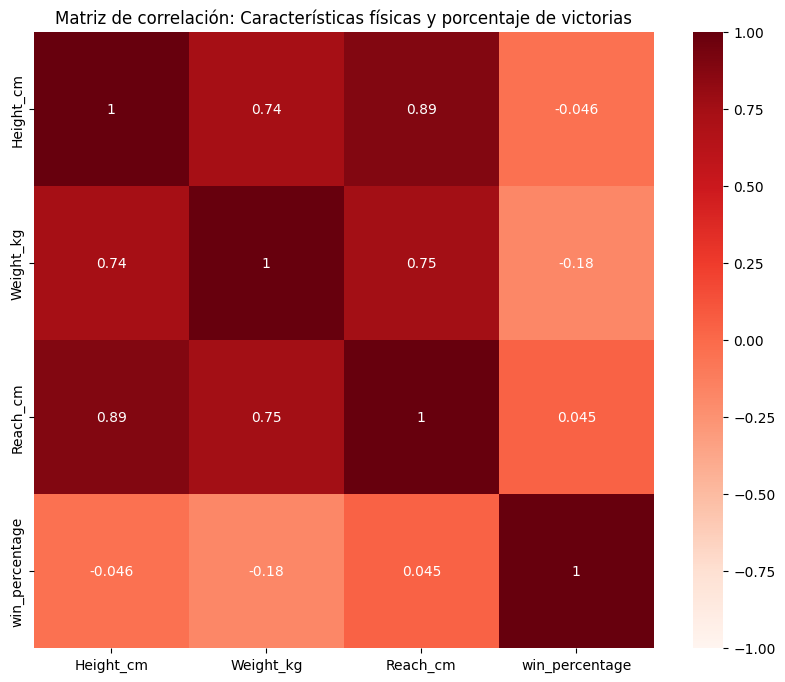

In [123]:
# Crear nueva columna para porcentaje de victorias
df1['win_percentage'] = (df1['Victories'] / (df1['Victories'] + df1['Defeats'])) * 100

# Calcular la matriz de correlacion entre fisico y porcentaje de victorias
matriz_rendimiento = df1[['Height_cm', 'Weight_kg', 'Reach_cm', 'win_percentage']].corr()

# Plot matriz de correlacion
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_rendimiento, annot=True, cmap='Reds', vmin=-1, vmax=1)
plt.title('Matriz de correlación: Características físicas y porcentaje de victorias')
plt.show()



In [125]:
from datetime import datetime

In [126]:
# Convertir la columna 'Date of Birth' a formato datetime
df1['Date of Birth'] = pd.to_datetime(df1['Date of Birth'], errors='coerce')

# Calcular la edad de cada luchador
current_year = datetime.now().year
df1['fighter_age'] = current_year - df1['Date of Birth'].dt.year


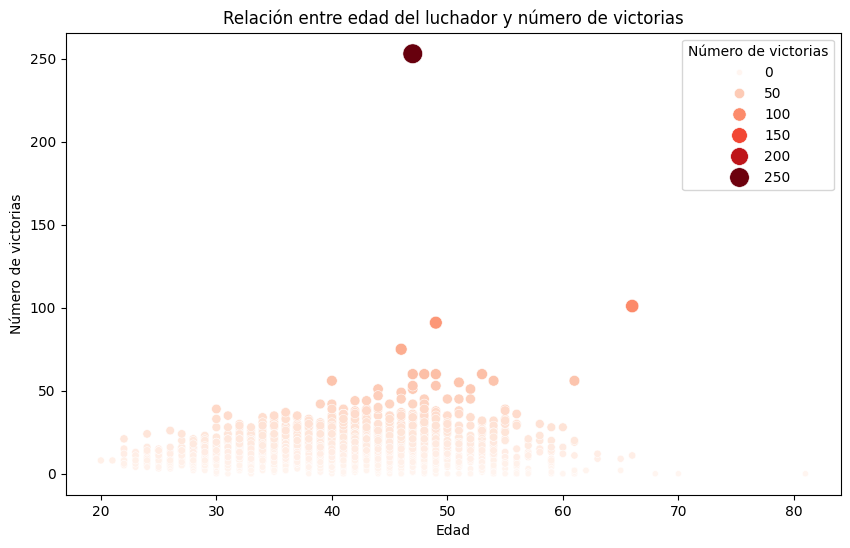

             fighter_age  Victories
fighter_age     1.000000   0.186036
Victories       0.186036   1.000000


In [137]:
# Gráfico de dispersión y cálculo de matriz de correlación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fighter_age', y='Victories', data=df1, hue='Victories', palette='Reds', size='Victories', sizes=(20, 200))
plt.title('Relación entre edad del luchador y número de victorias')
plt.xlabel('Edad')
plt.ylabel('Número de victorias')
plt.legend(title='Número de victorias')
plt.show()

corr_edad_victorias = df1[['fighter_age', 'Victories']].corr()

print(corr_edad_victorias)

#### df_1 Columnas de origen
* fighter_id: Identificación del luchador
* fighter_f_name: Nombre del luchador
* fighter_l_name: Apellido del luchador
* fighter_nickname: Apodo del luchador
* fighter_height_cm: Altura del luchador en centímetros
* fighter_weight_lbs: Peso del luchador en libras
* fighter_reach_cm: Alcance del luchador en centímetros
* fighter_stance: Guardias del luchador (e.g., Orthodox, Southpaw)
* fighter_dob: Fecha de nacimiento del luchador
* fighter_w: Número de victorias
* fighter_l: Número de derrotas
* fighter_d: Número de empates
* fighter_nc_dq: Número de combates sin resultado o descalificados
* fighter_url: URL del perfil del luchador

In [143]:
# Segundo dataset
df_2.head()
df2 = pd.read_csv("data/2-ufc-fighters-statistics-2024.csv", sep = ",")
df2

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [144]:
# Renombrar columnas
# Diccionario con los nombres actuales y los nuevos nombres de las columnas
nuevas_columnas = {
    'name': 'Name',
    'wins': 'Victories',
    'losses': 'Defeats',
    'height_cm': 'Height_cm',
    'weight_in_kg': 'Weight_kg',
    'reach_in_cm': 'Reach_cm',
    'stance': 'Stance',
    'date_of_birth': 'Date of Birth',
    'significant_strikes_landed_per_minute': 'Sig_Strikes_Minute',
    'significant_striking_accuracy': 'Sig_Strikes Accuracy',
    'significant_strikes_absorbed_per_minute': 'Sig_Strikes_Absorved_Min',
    'significant_strike_defence': 'Sig_Strikes_Defence',
    'average_takedowns_landed_per_15_minutes': 'Av_TD_Landed_per_15_Min',
    'takedown_accuracy': 'Takedown_Accuracy',
    'takedown_defense': 'Takedown_Defence',
    'average_submissions_attempted_per_15_minutes': 'Av_Subm_Attemt_per_15_Min',
}

# Renombrar las columnas usando el diccionario
df2.rename(columns=nuevas_columnas, inplace=True)
df2

,Name,nickname,Victories,Defeats,draws,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [145]:
# Borro las filas de luchadores que contienen valores NaN
df2_sin_nan = df2.dropna()
df2_sin_nan

,Name,nickname,Victories,Defeats,draws,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
22,Dione Barbosa,The Witch,6,2,0,167.64,56.70,167.64,Orthodox,1992-05-08,0.87,50.0,0.65,66.0,3.27,100.0,0.0,9.8
23,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,3.93,66.0,6.56,28.0,0.00,0.0,0.0,9.8
53,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,3.05,49.0,2.82,35.0,0.00,0.0,50.0,6.1
59,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,1.80,50.0,2.04,46.0,7.19,80.0,80.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,Kyron Bowen,Bullseye,9,5,0,190.50,83.91,185.42,Orthodox,1993-12-22,2.73,57.0,2.05,40.0,0.00,0.0,0.0,0.0
4096,Eperaim Ginting,The Wolfman,6,1,0,162.56,61.23,162.56,Orthodox,1995-11-30,0.00,0.0,0.00,100.0,15.52,100.0,0.0,0.0
4099,Jamelle Jones,The Beast,7,5,0,182.88,92.99,190.50,Orthodox,1988-01-31,1.78,80.0,3.11,65.0,0.00,0.0,0.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [146]:
# Borrar columnas
df2 = df2.drop(columns=["nickname"])

In [147]:
df2 = df2.drop(columns=["draws"])
df2

,Name,Victories,Defeats,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,Sig_Strikes_Minute,Sig_Strikes Accuracy,Sig_Strikes_Absorved_Min,Sig_Strikes_Defence,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
0,Robert Drysdale,7,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,15,37,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,13,9,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,7,4,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,8,2,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,1,1,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,12,20,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,6,1,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


#### df_2 Columnas
* name: Nombre del luchador
* nickname: Apodo del luchador
* wins: Número de victorias
* losses: Número de derrotas
* draws: Número de empates
* height_cm: Altura del luchador en centímetros
* weight_in_kg: Peso del luchador en kilogramos
* reach_in_cm: Alcance del luchador en centímetros
* stance: Guardia del luchador (e.g., Orthodox, Southpaw)
* date_of_birth: Fecha de nacimiento del luchador
* significant_strikes_landed_per_minute: Golpes significativos conectados por minuto
* significant_striking_accuracy: Precisión de los golpes significativos
* significant_strikes_absorbed_per_minute: Golpes significativos recibidos por minuto
* significant_strike_defence: Defensa de golpes significativos (porcentaje)
* average_takedowns_landed_per_15_minutes: Promedio de derribos por 15 minutos
* takedown_accuracy: Precisión de derribos (porcentaje)
* takedown_defense: Defensa de derribos (porcentaje)
* average_submissions_attempted_per_15_minutes: Promedio de intentos de sumisión por 15 minutos

In [148]:
# Tercer dataset (QUITAR, MISMOS DATOS QUE df2)
#df_3.head()
#df3 = pd.read_csv("data/3-ufc-fighters-statistics.csv", sep = ",")
#df3

In [149]:
# Cuarto dataset
#df_4.head()
#df4 = pd.read_csv("data/4-mma_ufc_fight_data.csv", sep = ",")
#df4


In [150]:
# Quinto dataset
#df_5.head()
#df5 = pd.read_csv("data/5-mma_ufc_fight_stat_data.csv", sep = ",")
#df5

In [151]:
# Sexto dataset
df_6.head()
df6 = pd.read_csv("data/UFC-complete/6-ufc_fighter_stats.csv", sep = ",")
df6

,name,wins,losses,height,weight,reach,stance,age,SLpM,sig_str_acc,SApM,str_def,td_avg,td_acc,td_def,sub_avg
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2477,Sean Daugherty,0.0,2.0,182.88,79.38,NaN,NaN,48.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [152]:
# Renombrar columnas
# Diccionario con los nombres actuales y los nuevos nombres de las columnas
nuevas_columnas = {
    'name': 'Name',
    #'nickname': 'Nickname',
    'wins': 'Victories',
    'losses': 'Defeats',
    #'draws': 'Draws',
    'height': 'Height_cm',
    'weight': 'Weight_kg',
    'reach': 'Reach_cm',
    'stance': 'Stance',
    'age': 'Date of Birth',
    #'significant_strikes_landed_per_minute': 'Sig_Strikes_Minute',
    'sig_str_acc': 'Sig_Strikes Accuracy',
    'significant_strikes_absorbed_per_minute': 'Sig_Strikes_Absorved_Min',
    'significant_strike_defence': 'Sig_Strikes_Defence',
    'td_avg': 'Av_TD_Landed_per_15_Min',
    'td_acc': 'Takedown_Accuracy',
    'td_def': 'Takedown_Defence',
    'sub_avg': 'Av_Subm_Attemt_per_15_Min',
}

# Renombrar las columnas usando el diccionario
df6.rename(columns=nuevas_columnas, inplace=True)
df6

,Name,Victories,Defeats,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,SLpM,Sig_Strikes Accuracy,SApM,str_def,Av_TD_Landed_per_15_Min,Takedown_Accuracy,Takedown_Defence,Av_Subm_Attemt_per_15_Min
0,Amanda Ribas,12.0,5.0,160.02,56.70,167.64,Orthodox,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,13.0,6.0,165.10,56.70,165.10,Orthodox,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Karl Williams,10.0,1.0,190.50,106.59,200.66,Orthodox,34.0,2.87,0.52,1.70,0.60,4.75,0.50,1.00,0.2
3,Justin Tafa,7.0,4.0,182.88,119.75,187.96,Southpaw,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
4,Edmen Shahbazyan,13.0,4.0,187.96,83.91,190.50,Orthodox,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,Thaddeus Luster,0.0,1.0,190.50,95.25,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2475,David Levicki,1.0,3.0,195.58,124.74,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2476,Ray Wizard,0.0,1.0,187.96,102.06,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
2477,Sean Daugherty,0.0,2.0,182.88,79.38,NaN,NaN,48.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [153]:
# Paso 1: Cargar los DataFrames desde los archivos CSV
file_path2 = 'data/2-ufc-fighters-statistics-2024.csv'
file_path6 = 'data/UFC-complete/6-ufc_fighter_stats.csv'

df2 = pd.read_csv(file_path2)
df6 = pd.read_csv(file_path6)

# Paso 2: Inspeccionar los DataFrames
print(df2.head())
print(df6.head())

# Paso 3: Limpiar los datos
# Eliminar espacios en blanco extra y convertir a minúsculas
df2['Name'] = df2['name'].str.strip().str.lower()
df6['Name'] = df6['name'].str.strip().str.lower()

# Paso 4: Realizar el merge utilizando la columna de nombres de luchadores como clave
merged_df = pd.merge(df2, df6, on='Name', how='inner')

# Paso 5: Eliminar duplicados y filtrar filas con campos vacíos
merged_df.drop_duplicates(subset='Name', inplace=True)
merged_df.dropna(inplace=True)

# Mostrar el DataFrame resultante
print(merged_df.head())

                name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                            

### df_6
* name: Nombre del luchador
* wins: Número de victorias
* losses: Número de derrotas
* height: Altura del luchador en centímetros
* weight: Peso del luchador en kilogramos
* reach: Alcance del luchador en centímetros
* stance: Guardia del luchador (e.g., Orthodox, Southpaw)
* age: Edad del luchador
* SLpM: Golpes significativos conectados por minuto (Significant Strikes Landed per Minute)
* sig_str_acc: Precisión de los golpes significativos (Significant Strike Accuracy)
* SApM: Golpes significativos recibidos por minuto (Significant Strikes Absorbed per Minute)
* str_def: Defensa de golpes (Strike Defense)
* td_avg: Promedio de derribos por 15 minutos (Takedowns Average)
* td_acc: Precisión de derribos (Takedown Accuracy)
* td_def: Defensa de derribos (Takedown Defense)
* sub_avg: Promedio de intentos de sumisión por 15 minutos (Submissions Average)

In [154]:
# Septimo dataset
#df_7.head()
#df7 = pd.read_csv("data/UFC-complete/7-ufc_large_dataset.csv", sep = ",")
#df7

In [155]:
# Merged datasets 2 and 6
merged_df.head()
merged_df = pd.read_csv("data/merged_ufc_fighters.csv", sep = ",")
merged_df

,Name,Nickname,Victories,Defeats,Draws,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Age
0,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,3.93,66.0,6.56,28.0,0.00,0.0,0.0,9.8,30.0
1,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,3.05,49.0,2.82,35.0,0.00,0.0,50.0,6.1,37.0
2,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,1.80,50.0,2.04,46.0,7.19,80.0,80.0,5.4,45.0
3,Matt Arroyo,No Regard,3,3,0,177.80,77.11,182.88,Orthodox,1982-09-01,1.62,47.0,2.01,58.0,2.12,36.0,100.0,5.3,41.0
4,Ronda Rousey,Rowdy,12,2,0,170.18,61.23,167.64,Orthodox,1987-02-01,4.17,52.0,4.14,44.0,6.26,68.0,50.0,4.8,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,Norma Dumont,The Immortal,10,2,0,170.18,65.77,170.18,Orthodox,1990-10-01,3.41,49.0,1.99,66.0,1.39,64.0,72.0,0.0,33.0
1262,Cristian Quinonez,Problema,18,4,0,172.72,61.23,177.80,Orthodox,1996-04-26,5.23,42.0,5.13,59.0,0.73,100.0,85.0,0.0,27.0
1263,Shinsho Anzai,Animal,10,3,0,170.18,77.11,177.80,Orthodox,1985-12-01,3.23,58.0,3.75,45.0,1.83,16.0,75.0,0.0,38.0
1264,Dusko Todorovic,Thunder,12,4,0,185.42,83.91,187.96,Orthodox,1994-05-19,5.54,57.0,4.55,46.0,0.96,12.0,45.0,0.0,29.0


In [156]:
# Renombrar columnas
# Diccionario con los nombres actuales y los nuevos nombres de las columnas
nuevas_columnas = {
    'name_x': 'Name',
    'nickname': 'Nickname',
    'wins_x': 'Victories',
    'losses_x': 'Defeats',
    'draws': 'Draws',
    'height_cm': 'Height_cm',
    'weight_in_kg': 'Weight_kg',
    'reach_in_cm': 'Reach_cm',
    'date_of_birth': 'Date of Birth',
    'Sig_Strikes_Minute': 'Stancey',
    'age': 'Age',
    'SLpM': 'Sig_Strikes_Minute',
    'sig_str_acc': 'Sig_Strikes Accuracy',
    'SApM': 'Sig_Strikes_Absorved_Min',
    'str_def': 'Sig_Strikes_Defence',
    'td_avg': 'Av_TD_Landed_per_15_Min',
    'td_acc': 'Takedown_Accuracy',
    'td_def': 'Takedown_Defence',
    'sub_avg': 'Av_Subm_Attemt_per_15_Min',
}

# Renombrar las columnas usando el diccionario
merged_df.rename(columns=nuevas_columnas, inplace=True)
merged_df

,Name,Nickname,Victories,Defeats,Draws,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Age
0,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,3.93,66.0,6.56,28.0,0.00,0.0,0.0,9.8,30.0
1,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,3.05,49.0,2.82,35.0,0.00,0.0,50.0,6.1,37.0
2,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,1.80,50.0,2.04,46.0,7.19,80.0,80.0,5.4,45.0
3,Matt Arroyo,No Regard,3,3,0,177.80,77.11,182.88,Orthodox,1982-09-01,1.62,47.0,2.01,58.0,2.12,36.0,100.0,5.3,41.0
4,Ronda Rousey,Rowdy,12,2,0,170.18,61.23,167.64,Orthodox,1987-02-01,4.17,52.0,4.14,44.0,6.26,68.0,50.0,4.8,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,Norma Dumont,The Immortal,10,2,0,170.18,65.77,170.18,Orthodox,1990-10-01,3.41,49.0,1.99,66.0,1.39,64.0,72.0,0.0,33.0
1262,Cristian Quinonez,Problema,18,4,0,172.72,61.23,177.80,Orthodox,1996-04-26,5.23,42.0,5.13,59.0,0.73,100.0,85.0,0.0,27.0
1263,Shinsho Anzai,Animal,10,3,0,170.18,77.11,177.80,Orthodox,1985-12-01,3.23,58.0,3.75,45.0,1.83,16.0,75.0,0.0,38.0
1264,Dusko Todorovic,Thunder,12,4,0,185.42,83.91,187.96,Orthodox,1994-05-19,5.54,57.0,4.55,46.0,0.96,12.0,45.0,0.0,29.0


In [157]:
merged_df.head()

,Name,Nickname,Victories,Defeats,Draws,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Age
0,Zach Reese,Savage,6,1,0,193.04,83.91,195.58,Switch,1994-03-24,3.93,66.0,6.56,28.0,0.00,0.0,0.0,9.8,30.0
1,John Albert,Prince,6,5,0,172.72,61.23,172.72,Orthodox,1986-10-13,3.05,49.0,2.82,35.0,0.00,0.0,50.0,6.1,37.0
2,Rob MacDonald,Maximus,5,4,0,190.50,92.99,198.12,Orthodox,1978-09-05,1.80,50.0,2.04,46.0,7.19,80.0,80.0,5.4,45.0
3,Matt Arroyo,No Regard,3,3,0,177.80,77.11,182.88,Orthodox,1982-09-01,1.62,47.0,2.01,58.0,2.12,36.0,100.0,5.3,41.0
4,Ronda Rousey,Rowdy,12,2,0,170.18,61.23,167.64,Orthodox,1987-02-01,4.17,52.0,4.14,44.0,6.26,68.0,50.0,4.8,37.0


In [158]:
for col in merged_df.columns:
    print(col)

Name
Nickname
Victories
Defeats
Draws
Height_cm
Weight_kg
Reach_cm
Stance
Date of Birth
significant_strikes_landed_per_minute
significant_striking_accuracy
significant_strikes_absorbed_per_minute
significant_strike_defence
average_takedowns_landed_per_15_minutes
takedown_accuracy
takedown_defense
average_submissions_attempted_per_15_minutes
Age


In [ ]:
merged_df = merged_df.drop(columns=["Sig_Strikes_Minute.1", "Sig_Strikes Accuracy", "Sig_Strikes_Absorved_Min", "Sig_Strikes_Defence", "Av_TD_Landed_per_15_Min", "Takedown_Accuracy", "Takedown_Defence", "Av_Subm_Attemt_per_15_Min"])

In [160]:
for col in merged_df.columns:
    print(col)

Name
Nickname
Victories
Defeats
Draws
Height_cm
Weight_kg
Reach_cm
Stance
Date of Birth
significant_strikes_landed_per_minute
significant_striking_accuracy
significant_strikes_absorbed_per_minute
significant_strike_defence
average_takedowns_landed_per_15_minutes
takedown_accuracy
takedown_defense
average_submissions_attempted_per_15_minutes
Age


In [161]:
# En esta lista hay dos luchadores de 60 años
merged_df[merged_df['Age'] == merged_df['Age'].max()]

,Name,Nickname,Victories,Defeats,Draws,Height_cm,Weight_kg,Reach_cm,Stance,Date of Birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Age
36,Ken Shamrock,The World's Most Dangerous Man,28,17,2,185.42,92.99,182.88,Orthodox,1964-02-11,1.47,46.0,4.30,39.0,0.94,60.0,44.0,2.5,60.0
480,Randy Couture,The Natural,19,11,0,185.42,92.99,190.50,Orthodox,1963-06-22,2.85,57.0,1.53,59.0,2.78,46.0,58.0,0.5,60.0


In [162]:
# Guardar el DataFrame resultante en un nuevo archivo CSV
merged_df.to_csv('data/merged_ufc_fighters.csv', index=False)

In [163]:
# Comparativa entre Strikers y Grapplers para ver que perfil obtiene mas victorias. 
# Golpeadores: Se centran más en golpes significativos. Podemos clasificarlos basándonos en un alto valor de significant_strikes_landed_per_minute y significant_striking_accuracy.
# Grapplers: Se centran más en derribos y sumisiones. Podemos clasificarlos basándonos en un alto valor de average_takedowns_landed_per_15_minutes, takedown_accuracy y average_submissions_attempted_per_15_minutes.
# Clasificar luchadores

# Umbral para clasificar luchadores
strike_threshold = 2.0  # Ajustar este valor según la distribución de datos
takedown_threshold = 1.0  # Ajustar este valor según la distribución de datos

# Clasificar luchadores
merged_df['Fighter Type'] = 'Mixed'
merged_df.loc[(merged_df['significant_strikes_landed_per_minute'] > strike_threshold) & 
       (merged_df['significant_striking_accuracy'] > 50), 'Fighter Type'] = 'Striker'
merged_df.loc[(merged_df['average_takedowns_landed_per_15_minutes'] > takedown_threshold) | 
       (merged_df['average_submissions_attempted_per_15_minutes'] > 0.5), 'Fighter Type'] = 'Grappler'

# Calcular el total de victorias para cada grupo
victories_by_type = merged_df.groupby('Fighter Type')['Victories'].sum()

# Mostrar los resultados
victories_by_type

Fighter Type
Grappler    13748
Mixed        4841
Striker      1114
Name: Victories, dtype: int64

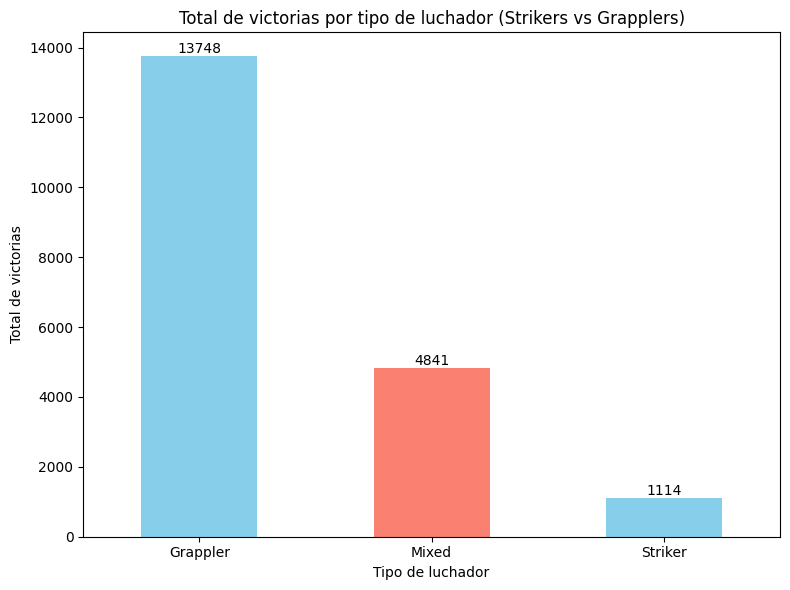

In [164]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
victories_by_type.plot(kind='bar', color=['skyblue', 'salmon'], ax=ax)

# Configurar etiquetas y título
plt.xlabel('Tipo de luchador')
plt.ylabel('Total de victorias')
plt.title('Total de victorias por tipo de luchador (Strikers vs Grapplers)')
plt.xticks(rotation=0)

# Añadir etiquetas encima de cada barra
for i, v in enumerate(victories_by_type):
    ax.text(i, v + 1, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [165]:
# Voy a ver cual es la guardia con menor numero de luchadores que la usan, voy a contar el numero 
# y voy a coger ese numero de luchadores de cada tipo de guardia para compararlos.

# Contar el número de luchadores por cada tipo de postura (stance)
stance_counts = df1['Stance'].value_counts()

# Encontrar el stance con el número más bajo de luchadores
min_stance_count = stance_counts.min()
min_stance = stance_counts.idxmin()

# Mostrar el stance con el menor número de luchadores y cuántos luchadores la usan
min_stance, min_stance_count

('Switch', 191)

In [166]:
df8 = pd.DataFrame()
fuente_8 = "data/mma_ufc_event_data.csv"

In [167]:
# Contar el número de luchadores por cada tipo de postura (stance)
stance_counts = df2['stance'].value_counts()

# Encontrar el stance con el número más bajo de luchadores
min_stance_count = stance_counts.min()
min_stance = stance_counts.idxmin()

# Mostrar el stance con el menor número de luchadores y cuántos luchadores la usan
min_stance, min_stance_count

('Sideways', 3)

In [168]:
# Contar el número de valores únicos en la columna 'fighter_stance'
stance_counts = df2['stance'].value_counts()

# Mostrar los valores únicos y sus cuentas
print(stance_counts)

stance
Orthodox       2526
Southpaw        560
Switch          192
Open Stance       7
Sideways          3
Name: count, dtype: int64


In [181]:
# Cojo 190 luchadores aleatoriamente de cada uno de los tres tipos de guardia mas comunes 
# y descarto los otros dos por no tener apenas luchadores (3 y 7)
# Creo un nuevo dataframe

# Filtrar el DataFrame para obtener solo los luchadores con los stances específicos
southpaw_fighters = df2[df2['stance'] == 'Southpaw']
orthodox_fighters = df2[df2['stance'] == 'Orthodox']
switch_fighters = df2[df2['stance'] == 'Switch']

# Seleccionar aleatoriamente 190 luchadores de cada tipo de guardia
southpaw_muestra = southpaw_fighters.sample(n=190, random_state=1)
orthodox_muestra = orthodox_fighters.sample(n=190, random_state=1)
switch_muestra = switch_fighters.sample(n=190, random_state=1)

# Concatenar las muestras en un solo DataFrame
muestra_luchadores = pd.concat([southpaw_muestra, orthodox_muestra, switch_muestra])

# Mostrar el número de luchadores seleccionados de cada tipo de guardia
print(muestra_luchadores['stance'].value_counts())

# Guardar los resultados en un nuevo archivo CSV
muestra_luchadores.to_csv('data/muestra_luchadores.csv', index=False)

stance
Southpaw    190
Orthodox    190
Switch      190
Name: count, dtype: int64


In [177]:
muestra_luchadores

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,Name
2350,Jose Barreto,NaN,0,1,0,NaN,83.91,NaN,Southpaw,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,jose barreto
3742,Natalia Silva,NaN,16,5,1,162.56,56.70,165.10,Southpaw,1997-02-03,5.20,48.0,2.23,65.0,0.68,33.0,92.0,0.0,natalia silva
2247,Rama Supandhi,Hellboy,8,4,0,165.10,56.70,167.64,Southpaw,1991-11-07,2.20,42.0,3.53,48.0,1.00,11.0,0.0,0.0,rama supandhi
3444,Justin Salas,J-Bomb,12,7,0,172.72,70.31,177.80,Southpaw,1982-03-13,3.42,43.0,2.96,68.0,2.43,20.0,0.0,0.0,justin salas
3375,Peter Petties,The Joker,5,3,0,180.34,65.77,182.88,Southpaw,1990-12-20,2.61,29.0,8.24,48.0,0.00,0.0,0.0,0.0,peter petties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,Blood Diamond,NaN,3,3,0,180.34,77.11,193.04,Switch,1988-07-10,3.12,55.0,2.17,48.0,0.00,0.0,73.0,0.0,blood diamond
1554,Gabe Green,Gifted,11,5,0,177.80,77.11,185.42,Switch,1993-05-02,6.28,45.0,6.95,47.0,0.83,50.0,53.0,0.3,gabe green
2564,Gregory Bouchelaghem,NaN,5,4,0,187.96,83.01,NaN,Switch,NaN,0.27,21.0,1.53,36.0,0.00,0.0,50.0,0.0,gregory bouchelaghem
2713,Kiefer Crosbie,BDK,10,4,0,180.34,77.11,177.80,Switch,1990-04-05,8.10,66.0,6.02,50.0,0.00,0.0,0.0,0.0,kiefer crosbie


In [171]:
# Calculo promedio de victorias y derrotas por tipo de guardia

# Seleccion de las columnas relevantes
columnas_de_interes = ['stance', 'wins', 'losses']
muestra_luchadores = muestra_luchadores[columnas_de_interes]

# Agrupo por el tipo de guardia y calculo el promedio de victorias y derrotas
stance_stats = muestra_luchadores.groupby('stance').mean().round(2)

stance_stats

,wins,losses
stance,,
Orthodox,13.08,5.62
Southpaw,13.88,5.93
Switch,11.47,4.25


In [172]:
# Selección de las columnas relevantes
columnas_de_interes = ['stance', 'wins', 'losses']
muestra_luchadores = muestra_luchadores[columnas_de_interes]

# Agrupo por el tipo de guardia y sumo el número de victorias
stance_victorias = muestra_luchadores.groupby('stance')['wins'].sum()

stance_victorias

stance
Orthodox    2485
Southpaw    2637
Switch      2180
Name: wins, dtype: int64

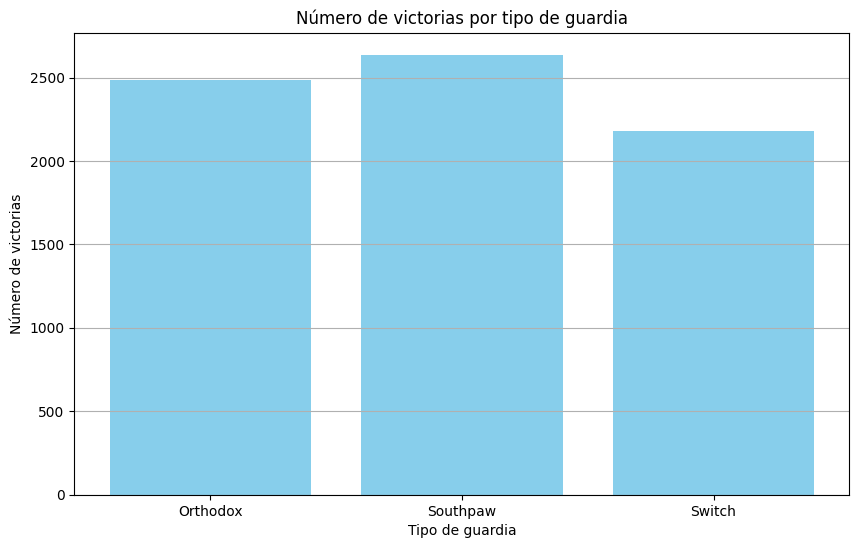

In [175]:
# Grafica para mostrar como se reparten las victorias comn una muestra aleatoria de 190 luchadores de cada tipo de guardia. 570 en total.
data = {
    'stance': ['Orthodox', 'Southpaw', 'Switch'],
    'wins': [2485, 2637, 2180]
}

# Crear el DataFrame
muestra_luchadores = pd.DataFrame(data)

# Crear un gráfico de barras para visualizar el número de victorias por tipo de stance
plt.figure(figsize=(10, 6))
plt.bar(muestra_luchadores['stance'], muestra_luchadores['wins'], color='skyblue')
plt.title('Número de victorias por tipo de guardia')
plt.xlabel('Tipo de guardia')
plt.ylabel('Número de victorias')
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()